# Liar Dataset

Implement preprocessing functions in this notebook depending on whatever classifier you're training and just import whichever functions you need into your own model notebook.

## General Imports

In [7]:
from datasets import load_dataset
import tqdm as notebook_tqdm
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Labels \\
0 ~ false \\
1 ~ half-true \\
2 ~ mostly true \\
3 ~ true \\
4 ~ barely true \\
5 ~ pants on fire \\

## Dataset Pre-processing

In [4]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, f1_score


In [5]:
dataset = load_dataset('liar')

Generating validation split: 100%|██████████| 1284/1284 [00:00<00:00, 12542.71 examples/s]


Split train/test datasets into 5 separate datasets, format labels in binary

In [6]:
trainds = dataset['train']
testds = dataset['test']
validationds = dataset['validation']

In [90]:
x_train = trainds['statement']
y_train = trainds['label']
x_test = testds['statement']
y_test = testds['label']
print(y_train)
label_mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5:1}
y_train = [label_mapping[label] for label in y_train]
y_test = [label_mapping[label] for label in y_test]

print(len(y_train))



[0, 1, 2, 0, 1, 3, 4, 1, 1, 2, 2, 1, 0, 2, 4, 1, 3, 4, 1, 2, 0, 2, 2, 1, 4, 0, 2, 1, 0, 2, 3, 4, 0, 2, 2, 3, 3, 3, 5, 3, 0, 1, 5, 5, 0, 1, 5, 0, 5, 3, 4, 4, 0, 3, 4, 1, 1, 4, 0, 2, 0, 2, 3, 2, 0, 5, 3, 0, 4, 4, 3, 4, 2, 2, 2, 3, 0, 4, 0, 1, 3, 1, 0, 0, 3, 1, 2, 2, 4, 0, 0, 3, 2, 1, 4, 4, 3, 2, 3, 2, 0, 5, 2, 2, 0, 3, 1, 3, 1, 0, 2, 1, 1, 4, 3, 2, 2, 5, 5, 0, 2, 2, 3, 2, 2, 3, 2, 0, 5, 1, 2, 2, 2, 4, 3, 0, 3, 5, 4, 2, 0, 4, 2, 2, 1, 3, 0, 1, 0, 4, 2, 4, 0, 1, 5, 3, 0, 1, 1, 4, 4, 4, 1, 1, 0, 4, 0, 5, 2, 1, 3, 1, 1, 2, 1, 0, 2, 1, 3, 3, 3, 3, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 5, 1, 3, 2, 0, 0, 1, 5, 2, 4, 0, 4, 0, 4, 0, 0, 0, 3, 3, 0, 3, 2, 4, 3, 3, 0, 1, 1, 2, 1, 3, 4, 2, 3, 3, 4, 1, 1, 2, 1, 2, 2, 1, 5, 2, 4, 4, 3, 0, 3, 2, 2, 1, 1, 3, 4, 0, 1, 1, 2, 2, 4, 0, 1, 3, 3, 0, 2, 4, 5, 0, 3, 5, 4, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 4, 1, 4, 0, 3, 1, 2, 0, 4, 4, 1, 2, 0, 0, 5, 3, 2, 4, 4, 4, 5, 0, 2, 2, 5, 2, 0, 5, 2, 1, 0, 1, 1, 3, 3, 4, 4, 1, 4, 1, 3, 5, 1, 4, 4, 4, 3, 4, 0, 1, 1, 0, 4, 4, 5, 2, 0, 

In [91]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['statement'])

In [92]:
pac = PassiveAggressiveClassifier(max_iter=3000,early_stopping=True, shuffle=True, random_state=595)

pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')


Accuracy: 58.38%


In [100]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, .000010, .000100], 'max_iter': [100, 20, 50, 1500]}

# Create the PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(pac, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(tfidf_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Use the best estimator for predictions
best_pac = grid_search.best_estimator_
y_pred_tuned = best_pac.predict(tfidf_test)

# Evaluate the model with the best parameters
score_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {round(score_tuned * 100, 2)}%')


/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

Best Parameters:  {'C': 1e-05, 'max_iter': 100}
Tuned Model Accuracy: 63.83%


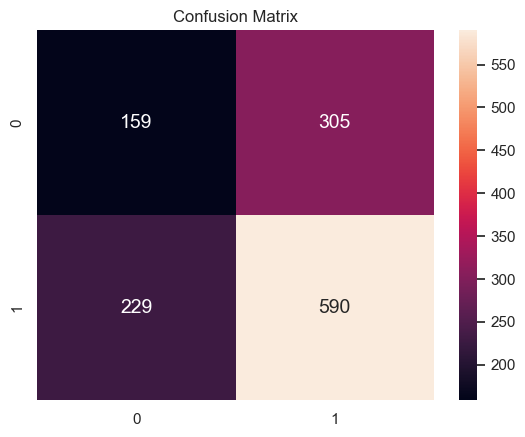


Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.34      0.37       464
           1       0.66      0.72      0.69       819

    accuracy                           0.58      1283
   macro avg       0.53      0.53      0.53      1283
weighted avg       0.57      0.58      0.57      1283



In [93]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))

In [111]:
from gensim.models import KeyedVectors
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from datasets import load_dataset
import pandas as pd
from glove_embedding import embed_glove, load_glove, retrieve_unk

import gensim
import pickle

assert int(gensim.__version__.split(".")[0]) >= 4

import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

# # Load Liar Dataset
# dataset = load_dataset('liar')
# train = dataset['train']
# test = dataset['test']

# # Convert labels to binary
# label_mapping = {'false': 0, 'half-true': 1, 'mostly-true': 1, 'true': 1, 'barely-true': 0}
# train['label'] = train['label'].map(label_mapping)
# test['label'] = test['label'].map(label_mapping)

# x_train = train['statement']
# y_train = train['label']
# x_test = test['statement']
# y_test = test['label']

# Function to load GloVe embeddings
embedding_dict = load_glove("glove.6B.50d.txt")

# Load pre-trained GloVe embeddings (GloVe Twitter 50-dimensional embeddings)
unknown_embedding = retrieve_unk(embedding_dict)

# Set arbitrary pad length for each sentence
pad_len = 15

# Get embedded training dataset
train_sentences = x_train
X_train = embed_glove(train_sentences, embedding_dict, pad_len, unknown_embedding)

# Get embedded test dataset
test_sentences = x_test
X_test = embed_glove(test_sentences, embedding_dict, pad_len, unknown_embedding)


# Function to get the vector representation of a document using GloVe embeddings
# def get_doc_vector_glove(doc, glove_model):
#     vectors = [glove_model[word] for word in doc.split() if word in glove_model]
#     return np.mean(vectors, axis=0) if vectors else np.zeros(glove_model.vector_size)

# # Apply the function to your data
# x_train_glove = np.vstack([get_doc_vector_glove(doc, glove_model) for doc in x_train])
# x_test_glove = np.vstack([get_doc_vector_glove(doc, glove_model) for doc in x_test])

# Hyperparameter Tuning
param_grid = {'C': [0.1, .000001, 10, 100], 'max_iter': [90, 20, 100, 1500]}
pac = PassiveAggressiveClassifier()
grid_search = GridSearchCV(pac, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_pac = grid_search.best_estimator_

# Cross-Validation
cv_scores = cross_val_score(best_pac, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train and Evaluate with the Best Parameters
best_pac.fit(X_train, y_train)
y_pred_tuned = best_pac.predict(X_test)
score_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {round(score_tuned * 100, 2)}%')


Cross-Validation Scores: [0.64216164 0.64459591 0.64605648 0.64410906 0.64344861]
Mean CV Accuracy: 0.644074337742141
Tuned Model Accuracy: 63.83%


Naive Bayes

In [117]:
from naive_bayes import train, predict, evaluate

trainds = dataset['train']
testds = dataset['test']
train_data = trainds['statement']
train_labels = trainds['label']

test_data = testds['statement']
test_label = testds['label']


trained_model = train(x_train, y_train)
model_predictions, ground_truth = predict(trained_model, x_test, y_test)
accuracy = evaluate(model_predictions, ground_truth)

print('Accuracy: %s' % str(accuracy))

loaded training data
processed data 10269 105
processed data 1283 40
Accuracy: 0.622759158222915
